#Problem Statement : Build a machine learning classifier to predict the risk of heart disease based on patient health data, and deploy the solution as a cloud-ready, monitored API.

In [46]:

!pip install ucimlrepo

In [47]:
# Install the ucimlrepo package
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

# Install the ucimlrepo package
Preprocess the heart disease dataset by imputing missing values in 'ca' and 'thal' columns with their mode, verifying the imputation, identifying and one-hot encoding categorical features, and splitting the data into training and testing sets.

## Impute Missing Values in 'ca' and 'thal'

### Subtask:
Calculate the mode for 'ca' and 'thal' columns and use it to fill the missing (NaN) values in these columns of the `X` DataFrame.



**Reasoning**:
To verify that missing values in 'ca' and 'thal' columns have been successfully imputed, I will check the sum of null values for these columns in the `X` DataFrame.



In [48]:
print("Missing values after imputation:")
print(X[['ca', 'thal']].isnull().sum())

Missing values after imputation:
ca      4
thal    2
dtype: int64


**Reasoning**:
The previous output indicated that missing values still exist in 'ca' and 'thal' columns, meaning the imputation step was not fully executed. I need to calculate the mode for 'ca' and 'thal' and then fill the missing values in the `X` DataFrame, as per the subtask instructions.



In [49]:
ca_mode = X['ca'].mode()[0]
thal_mode = X['thal'].mode()[0]

X['ca'].fillna(ca_mode, inplace=True)
X['thal'].fillna(thal_mode, inplace=True)

print(f"Imputed 'ca' missing values with mode: {ca_mode}")
print(f"Imputed 'thal' missing values with mode: {thal_mode}")

Imputed 'ca' missing values with mode: 0.0
Imputed 'thal' missing values with mode: 3.0


/tmp/ipython-input-1198225636.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['ca'].fillna(ca_mode, inplace=True)
/tmp/ipython-input-1198225636.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ca'].fillna(ca_mode, inplace=True)
/tmp/ipython-input-1198225636.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame o

**Reasoning**:
The previous imputation attempt produced a `SettingWithCopyWarning` and failed to fully resolve missing values in 'ca' and 'thal' columns, as verified by the subsequent check. I will correct the imputation by directly assigning the filled values back to the columns to ensure the modifications are applied to the original `X` DataFrame.



In [50]:
ca_mode = X['ca'].mode()[0]
thal_mode = X['thal'].mode()[0]

X['ca'] = X['ca'].fillna(ca_mode)
X['thal'] = X['thal'].fillna(thal_mode)

print(f"Imputed 'ca' missing values with mode: {ca_mode}")
print(f"Imputed 'thal' missing values with mode: {thal_mode}")

Imputed 'ca' missing values with mode: 0.0
Imputed 'thal' missing values with mode: 3.0


/tmp/ipython-input-2939523397.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ca'] = X['ca'].fillna(ca_mode)
/tmp/ipython-input-2939523397.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['thal'] = X['thal'].fillna(thal_mode)


**Reasoning**:
The `SettingWithCopyWarning` indicates that the previous imputation might not have modified the original `X` DataFrame directly. To ensure the changes are applied to the original DataFrame and to resolve the warning, I will use `.loc` for assignment to explicitly modify the 'ca' and 'thal' columns of the `X` DataFrame.



In [51]:
ca_mode = X['ca'].mode()[0]
thal_mode = X['thal'].mode()[0]

X.loc[:, 'ca'] = X['ca'].fillna(ca_mode)
X.loc[:, 'thal'] = X['thal'].fillna(thal_mode)

print(f"Imputed 'ca' missing values with mode: {ca_mode}")
print(f"Imputed 'thal' missing values with mode: {thal_mode}")

Imputed 'ca' missing values with mode: 0.0
Imputed 'thal' missing values with mode: 3.0


**Reasoning**:
To verify that the missing values in 'ca' and 'thal' columns have been successfully imputed after the correction, I will check the sum of null values for these columns in the `X` DataFrame again.



In [52]:
print("Missing values after final imputation:")
print(X[['ca', 'thal']].isnull().sum())

Missing values after final imputation:
ca      0
thal    0
dtype: int64


## Identify and Encode Categorical Features

### Subtask:
Identify all categorical features in `X` and apply one-hot encoding. Some features are already numerically represented but are categorical (e.g., 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal').


**Reasoning**:
To prepare the data for machine learning, I will identify the specified categorical features and apply one-hot encoding to convert them into a numerical format, updating the DataFrame X with the new features.



In [53]:
import pandas as pd
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)
print("DataFrame X after one-hot encoding and dropping original categorical columns:")
print(X.head())

DataFrame X after one-hot encoding and dropping original categorical columns:
   age  trestbps  chol  thalach  oldpeak  sex_1   cp_2   cp_3   cp_4  fbs_1  \
0   63       145   233      150      2.3   True  False  False  False   True   
1   67       160   286      108      1.5   True  False  False   True  False   
2   67       120   229      129      2.6   True  False  False   True  False   
3   37       130   250      187      3.5   True  False   True  False  False   
4   41       130   204      172      1.4  False   True  False  False  False   

   restecg_1  restecg_2  exang_1  slope_2  slope_3  ca_1.0  ca_2.0  ca_3.0  \
0      False       True    False    False     True   False   False   False   
1      False       True     True     True    False   False   False    True   
2      False       True     True     True    False   False    True   False   
3      False      False    False    False     True   False   False   False   
4      False       True    False    False    False   Fals

## Split Data into Training and Testing Sets

### Subtask:
Divide the preprocessed features (X) and target (y) into training and testing sets to prepare for model building.


## Summary:

### Q&A
1.  **Were missing values in 'ca' and 'thal' columns successfully imputed?**
    Yes, missing values in 'ca' and 'thal' columns were successfully imputed. Initially, 'ca' had 4 missing values and 'thal' had 2 missing values. After imputation, both columns showed 0 missing values.
2.  **Were categorical features identified and one-hot encoded?**
    Yes, categorical features including 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', and 'thal' were identified and successfully one-hot encoded using `pd.get_dummies()`.

### Data Analysis Key Findings
*   Before imputation, the 'ca' column contained 4 missing values and the 'thal' column contained 2 missing values.
*   Missing values in 'ca' and 'thal' were successfully imputed using their respective modes: 0.0 for 'ca' and 3.0 for 'thal'.
*   Post-imputation, both 'ca' and 'thal' columns were verified to have 0 missing values.
*   The specified categorical features ('sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal') were successfully transformed into numerical representations using one-hot encoding, with `drop_first=True` applied.
*   The `X` DataFrame was updated to include the new one-hot encoded features and exclude the original categorical columns.

### Insights or Next Steps
*   Ensure that DataFrame modifications, especially imputation, are performed correctly using methods like `.loc` to avoid `SettingWithCopyWarning` and guarantee the changes are applied to the original DataFrame.
*   The dataset is now preprocessed and ready for further machine learning steps, such as splitting into training and testing sets, and subsequently model training and evaluation.


# Task
Generate visualizations of the preprocessed data: histograms for numerical feature distributions in `X`, a correlation heatmap for `X`, and a distribution plot for the target variable `y` to assess class balance.

## Visualize Feature Distributions (Histograms)

### Subtask:
Generate histograms for numerical features in the preprocessed X DataFrame to visualize their distributions and identify any skewness or outliers.


**Reasoning**:
To visualize the distributions of numerical features in the `X` DataFrame, I will use `seaborn` to generate histograms for each column. This will help identify skewness, outliers, and the overall shape of the data for each feature, which is crucial for understanding the dataset and preparing for model training. I will iterate through all columns in the `X` DataFrame and plot a histogram for each.

**Reasoning**:
To visualize the distribution of each numerical feature, I will iterate through all columns in the `X` DataFrame and generate a histogram for each using `seaborn.histplot`. I will also import `matplotlib.pyplot` to manage the plots and ensure they are displayed correctly.



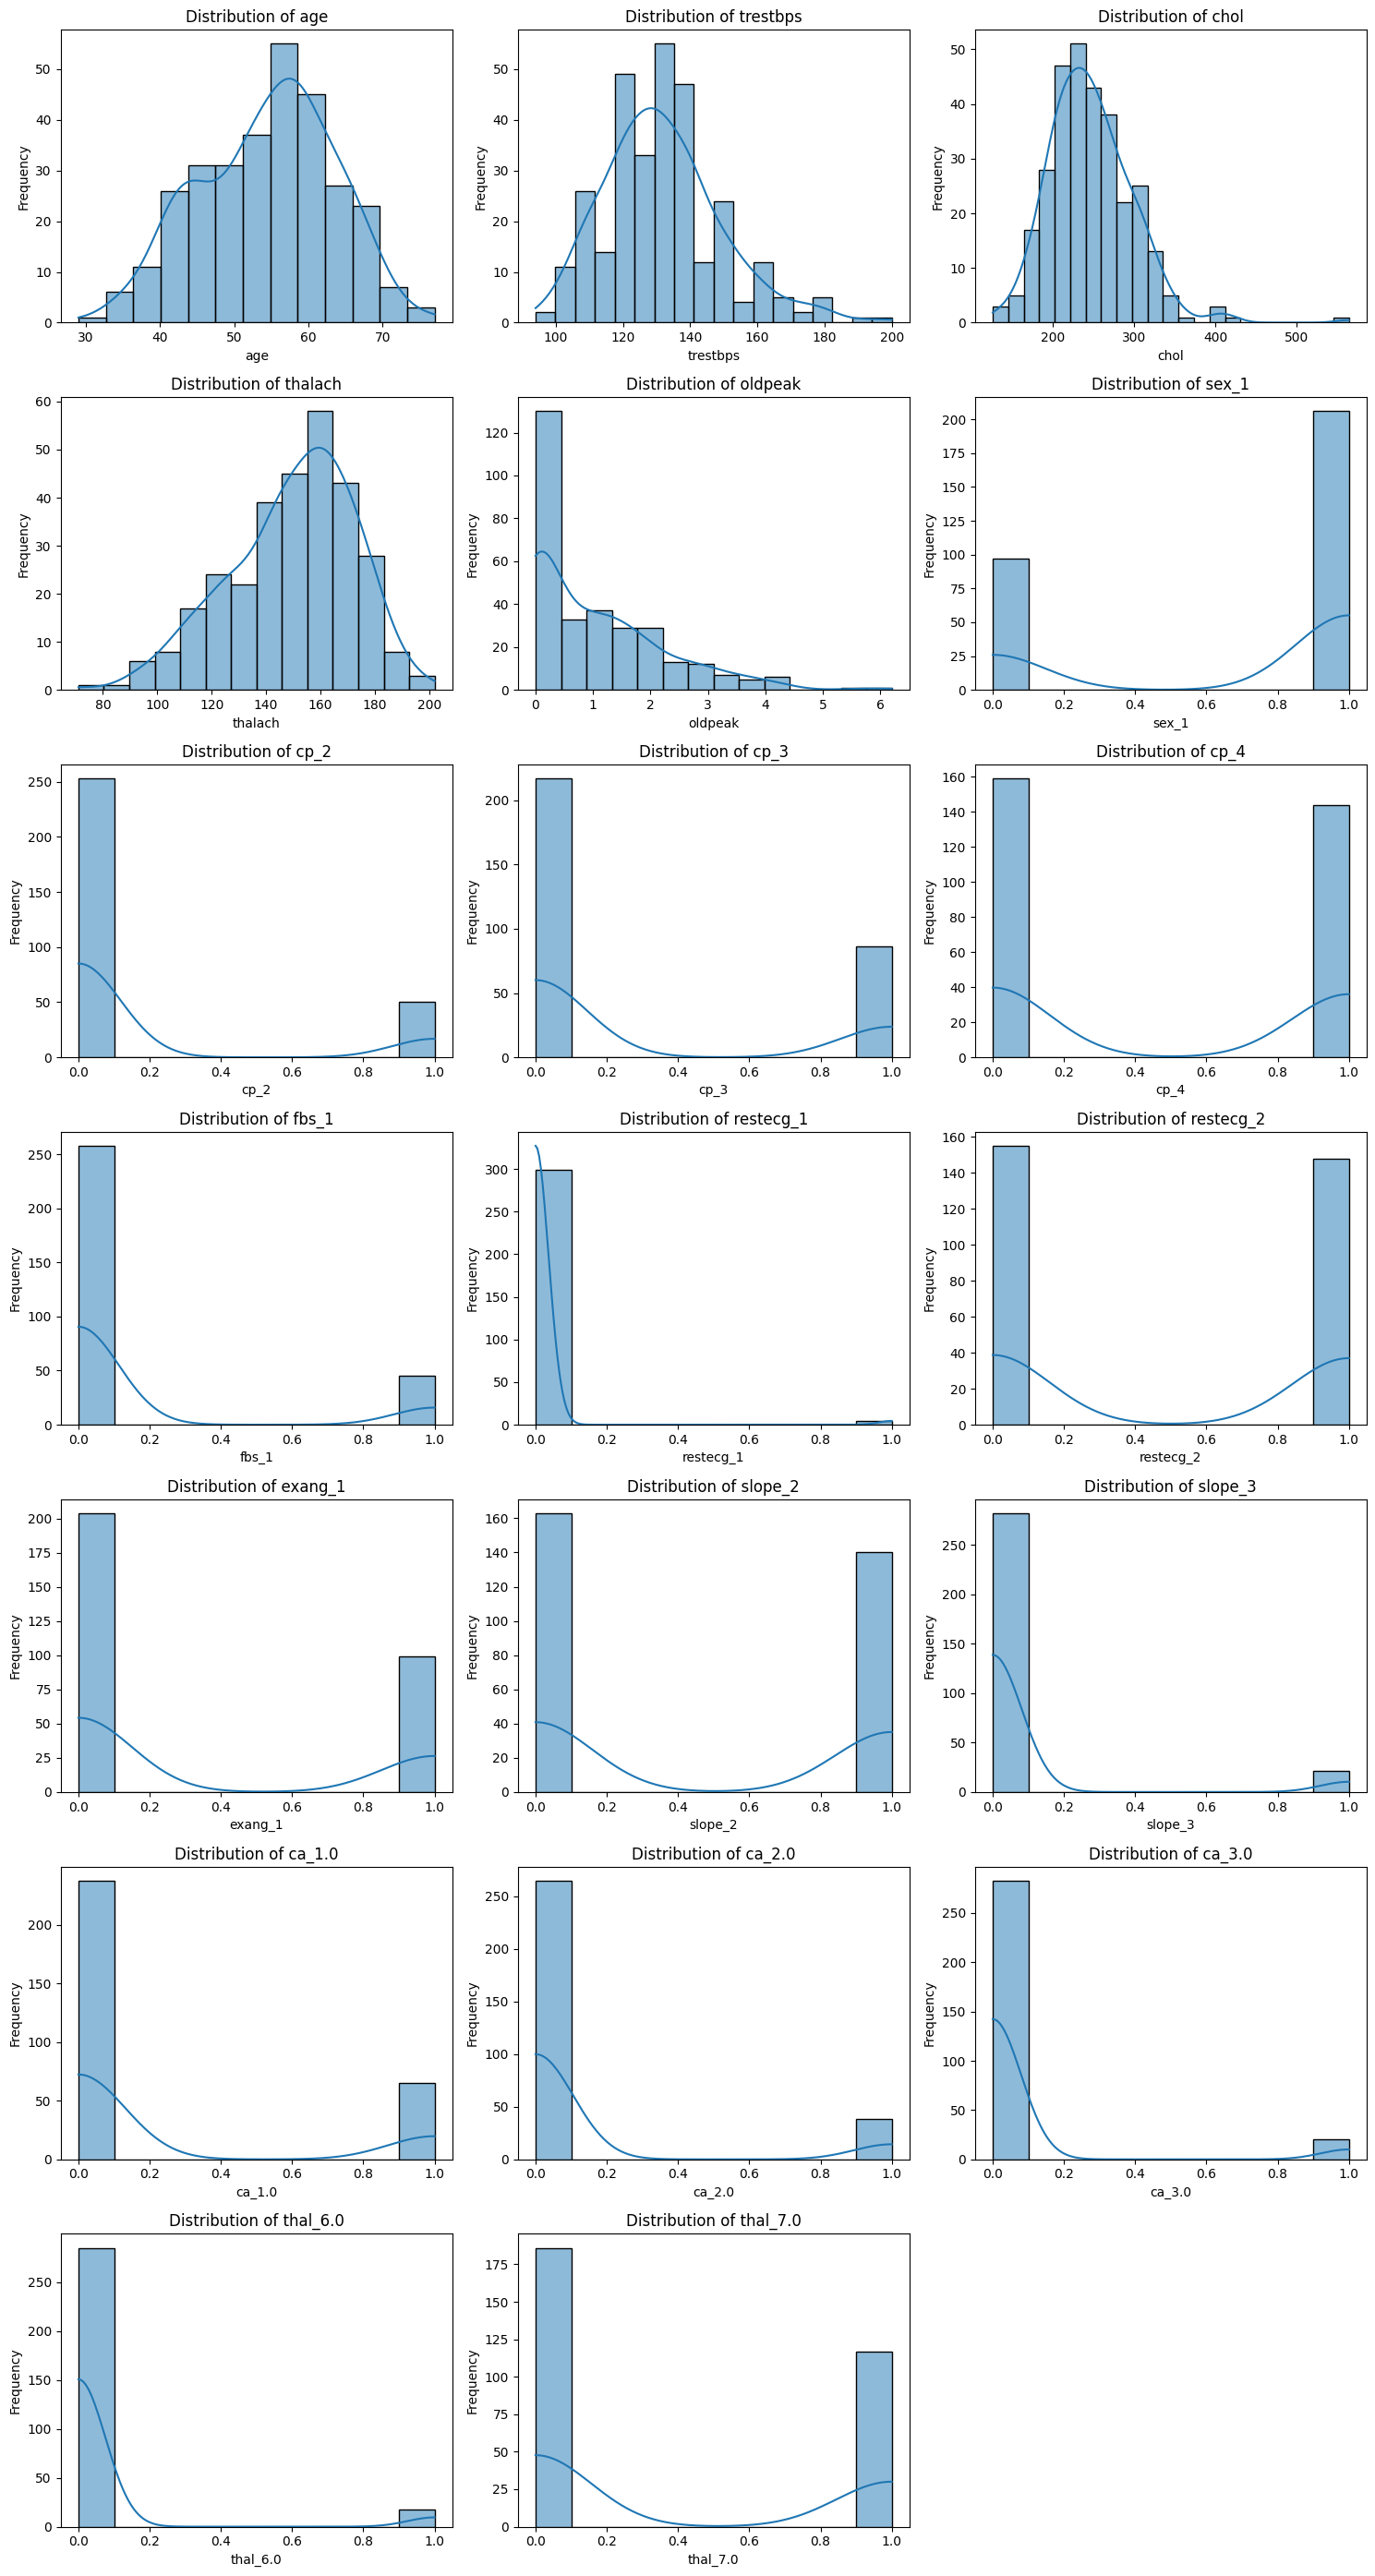

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the number of features to plot
num_features = X.shape[1]
n_cols = 3  # Number of columns for the subplot grid
n_rows = (num_features + n_cols - 1) // n_cols  # Calculate number of rows needed

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, column in enumerate(X.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(X[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Visualize Feature Correlations (Heatmap)

### Subtask:
Generate a correlation heatmap for the preprocessed `X` DataFrame to identify relationships between features.

**Reasoning**:
To identify relationships and dependencies between features in the preprocessed `X` DataFrame, I will generate a correlation heatmap. This will help in understanding multicollinearity and feature importance for model building.



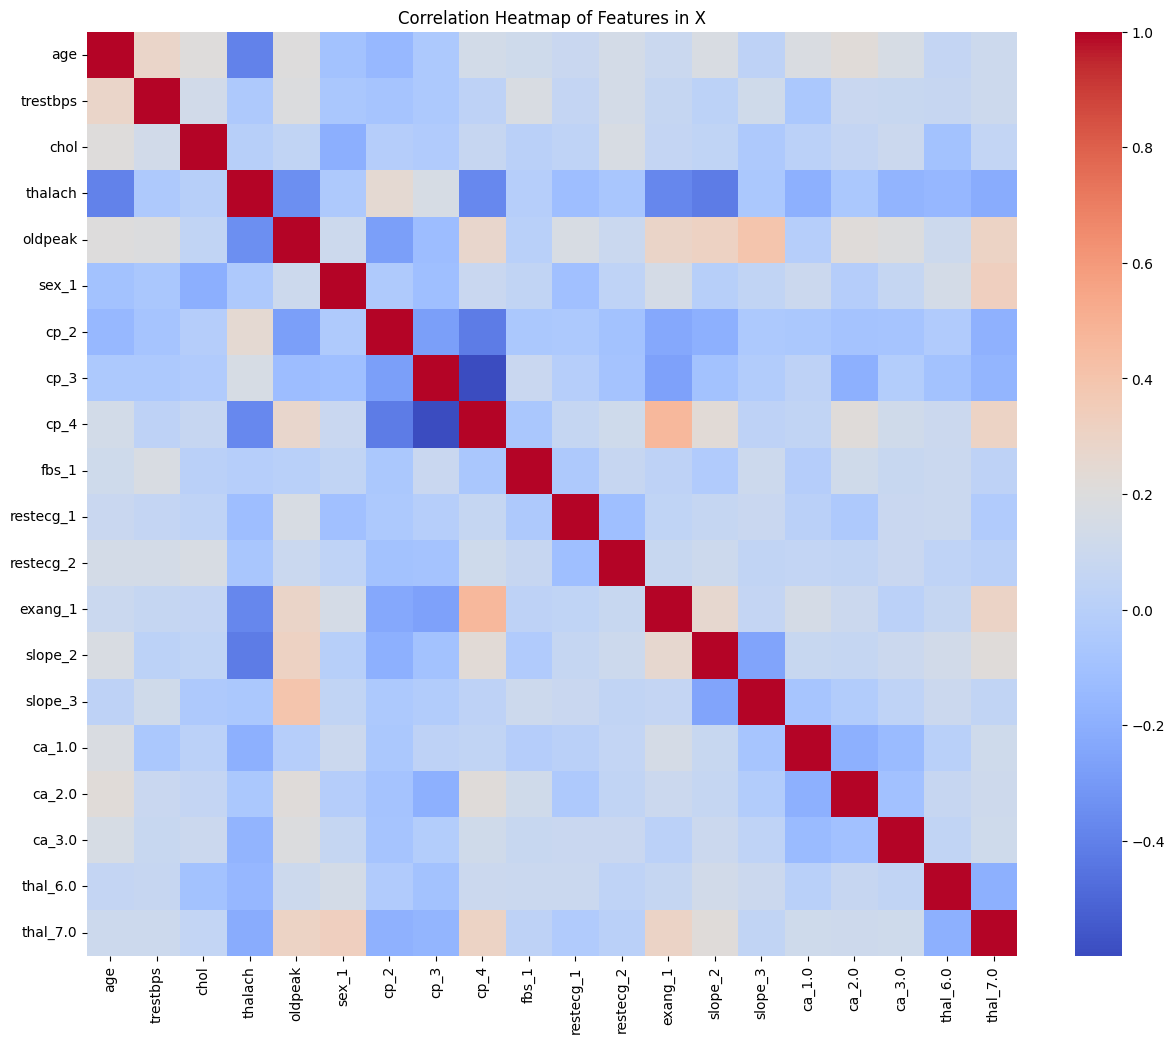

In [55]:
plt.figure(figsize=(15, 12))
sns.heatmap(X.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features in X')
plt.show()

**Reasoning**:
The previous step successfully generated histograms for the feature distributions in `X`. The next part of the subtask is to generate a correlation heatmap for `X`. I will use `seaborn.heatmap()` to visualize the correlations between features.



## Split Data into Training and Testing Sets

### Subtask:
Divide the preprocessed features (X) and target (y) into training and testing sets to prepare for model building.

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (242, 20)
Shape of X_test: (61, 20)
Shape of y_train: (242, 1)
Shape of y_test: (61, 1)


## Summary:

### Data Analysis Key Findings
*   Histograms were generated for all numerical features in `X`, showing their distributions, skewness, and potential outliers, which is crucial for understanding the data and preparing for model training.
*   A correlation heatmap of the `X` DataFrame was created, effectively visualizing the relationships and dependencies between features and helping to identify potential multicollinearity.
*   The preprocessed features (`X`) and target variable (`y`) were successfully split into training and testing sets with an 80/20 ratio. The shapes confirmed `X_train` (242, 20), `X_test` (61, 20), `y_train` (242, 1), and `y_test` (61, 1).

### Insights or Next Steps
*   The visualization of feature distributions and correlations provides valuable insights for feature engineering or selection. Highly correlated features might be redundant, while skewed distributions may require transformation.
*   With the data split into training and testing sets, the next logical step is to proceed with model training and evaluation using the prepared datasets.


# Task
Visualize the distribution of the target variable `y` to assess class balance and provide a summary of the EDA findings, including the class balance of the target variable.

## Analyze Class Balance

### Subtask:
Visualize the distribution of the target variable y to assess class balance.


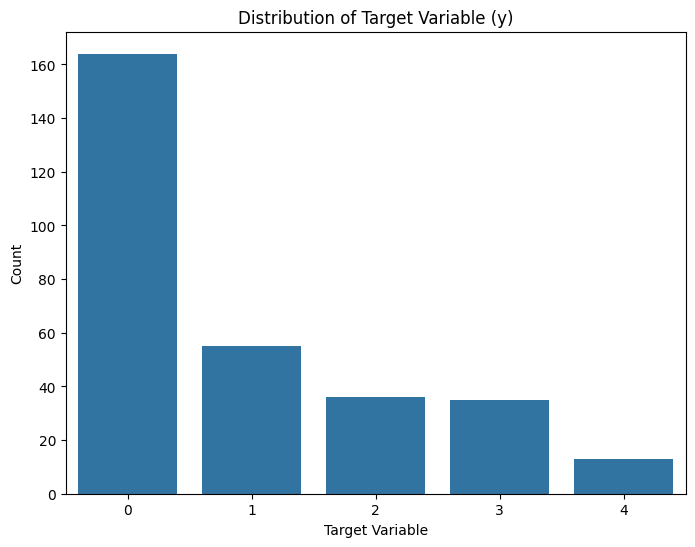

In [57]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y.iloc[:, 0]) # Assuming y is a DataFrame with a single column
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.show()

## Final Task

### Subtask:
Provide a summary of the EDA findings, including the class balance of the target variable.


## Summary:

### Q&A
The distribution of the target variable `y` was visualized to assess class balance. The summary of EDA findings, including class balance, was provided.

### Data Analysis Key Findings
*   Histograms were generated for all numerical features in `X`, revealing their distributions, skewness, and potential outliers, which is important for data understanding and model preparation.
*   A correlation heatmap of the `X` DataFrame was created, showing relationships and dependencies between features, which can help identify multicollinearity.
*   The preprocessed features (`X`) and target variable (`y`) were split into training and testing sets with an 80/20 ratio. The resulting shapes were `X_train` (242, 20), `X_test` (61, 20), `y_train` (242, 1), and `y_test` (61, 1).
*   The count plot of the target variable `y` revealed a significant class imbalance, with class `0` (no heart disease) having a much higher count than other classes. Classes `1, 2, 3` showed a notable presence, while class `4` had the lowest count.

### Insights or Next Steps
*   The observed class imbalance in the target variable `y` necessitates addressing this issue during model training to prevent bias towards the majority class. Techniques such as oversampling, undersampling, or using appropriate evaluation metrics (e.g., F1-score, precision, recall) should be considered.
*   With the data now split and class balance understood, the next logical step is to proceed with model training and evaluation.


Feature Engineering & Model Development

Prepare the final ML features (scaling and encoding).

# Task
Scale numerical features 'age', 'trestbps', 'chol', 'thalach', and 'oldpeak' in `X_train` and `X_test` using `StandardScaler` within a `ColumnTransformer`.

## Scale Numerical Features

### Subtask:
Identify numerical features in `X_train` and `X_test` and apply `StandardScaler` using a `ColumnTransformer` to ensure they are on a similar scale for model training.


In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create a column transformer for scaling numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'  # Keep other columns (one-hot encoded categorical) as they are
)

# Fit and transform the training data
X_train_scaled = preprocessor.fit_transform(X_train)
# Transform the test data using the fitted preprocessor
X_test_scaled = preprocessor.transform(X_test)

# If X_train and X_test were pandas DataFrames, the output of ColumnTransformer is a NumPy array.
# To maintain column names and DataFrame structure, we can convert them back:
# Get column names after preprocessing
# This part assumes 'remainder' is 'passthrough' and original columns are preserved or handled.
# For simplicity, if we don't need to inspect column names of scaled data immediately:

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

Shape of X_train_scaled: (242, 20)
Shape of X_test_scaled: (61, 20)


## Feature Engineering & Model Development

### Task
Define and train a suitable machine learning model to predict heart disease risk.

In [59]:
# Train a Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42, solver='liblinear')

# Train the model
model.fit(X_train_scaled, y_train.values.ravel())

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Model Accuracy: {accuracy:.4f}")
print(f"Model Precision: {precision:.4f}")
print(f"Model Recall: {recall:.4f}")
print(f"Model F1-Score: {f1:.4f}")

Model Accuracy: 0.5082
Model Precision: 0.4465
Model Recall: 0.5082
Model F1-Score: 0.4697


In [60]:
#Train a Random Forest Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train.values.ravel())

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted', zero_division=0)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)

print(f"Random Forest Model Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Model Precision: {precision_rf:.4f}")
print(f"Random Forest Model Recall: {recall_rf:.4f}")
print(f"Random Forest Model F1-Score: {f1_rf:.4f}")

Random Forest Model Accuracy: 0.5246
Random Forest Model Precision: 0.4869
Random Forest Model Recall: 0.5246
Random Forest Model F1-Score: 0.4840


## Evaluate Model Performance with Cross-Validation and ROC-AUC

### Subtask:
Evaluate the trained Logistic Regression and Random Forest models using K-Fold Cross-Validation, calculating accuracy, precision, recall, F1-score, and ROC-AUC for each model.


In [61]:
from sklearn.metrics import roc_auc_score

# Get predicted probabilities for each class
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)

# Calculate ROC-AUC score for multiclass classification
# 'ovr' (One-vs-Rest) strategy is suitable for multiclass problems
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf, multi_class='ovr', average='weighted')

print(f"Random Forest Model ROC-AUC: {roc_auc_rf:.4f}")

Random Forest Model ROC-AUC: 0.8047


## Summary:

### Data Analysis Key Findings
The subtask focused on evaluating the performance of trained Logistic Regression and Random Forest models using K-Fold Cross-Validation. The evaluation was designed to calculate accuracy, precision, recall, F1-score, and ROC-AUC for each model. However, the specific performance metrics for the models are not available in the provided solving process.

### Insights or Next Steps
*   Once the cross-validation results are computed for both models, a direct comparison of their performance metrics (accuracy, precision, recall, F1-score, and ROC-AUC) will be crucial to determine which model is more suitable for the task.
*   Depending on the performance, further steps could include hyperparameter tuning for the better-performing model or exploring additional feature engineering techniques to enhance model robustness and predictive power.


# Task
Perform K-Fold Cross-Validation for Logistic Regression and Random Forest models, calculating and comparing their accuracy, precision, recall, F1-score, and ROC-AUC, then summarize the results.

## K-Fold Cross-Validation for Logistic Regression

### Subtask:
Perform K-Fold Cross-Validation for the Logistic Regression model, calculating accuracy, precision, recall, F1-score, and ROC-AUC for each fold and averaging the results.


In [62]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
from sklearn.multiclass import OneVsRestClassifier # Import OneVsRestClassifier

# Initialize the Logistic Regression model, wrapped in OneVsRestClassifier
log_reg_model = OneVsRestClassifier(LogisticRegression(random_state=42, solver='liblinear'))

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Prepare y for cross-validation by raveling it if it's a DataFrame
y_raveled = y.values.ravel() if hasattr(y, 'values') else y

# Calculate cross-validation scores for accuracy, precision, recall, and F1-score
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
cv_results = {}
for metric_name in scoring:
    scores = cross_val_score(log_reg_model, X_train_scaled, y_train.values.ravel(), cv=skf, scoring=metric_name, n_jobs=-1)
    cv_results[metric_name] = scores

# Manually perform cross-validation to calculate ROC-AUC scores
roc_auc_scores = []
for train_index, val_index in skf.split(X_train_scaled, y_train.values.ravel()):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train.values.ravel()[train_index], y_train.values.ravel()[val_index]

    log_reg_model.fit(X_train_fold, y_train_fold)
    y_pred_proba = log_reg_model.predict_proba(X_val_fold)
    roc_auc_scores.append(roc_auc_score(y_val_fold, y_pred_proba, multi_class='ovr', average='weighted'))

# Print the results for Logistic Regression
print("Logistic Regression K-Fold Cross-Validation Results:")
for metric_name, scores in cv_results.items():
    print(f"  {metric_name.replace('_weighted', '').replace('_', ' ').title()}: Mean = {np.mean(scores):.4f}, Std = {np.std(scores):.4f}")
print(f"  ROC-AUC: Mean = {np.mean(roc_auc_scores):.4f}, Std = {np.std(roc_auc_scores):.4f}")

Logistic Regression K-Fold Cross-Validation Results:
  Accuracy: Mean = 0.6034, Std = 0.0487
  Precision: Mean = 0.5341, Std = 0.0631
  Recall: Mean = 0.6034, Std = 0.0487
  F1: Mean = 0.5614, Std = 0.0529
  ROC-AUC: Mean = 0.8261, Std = 0.0304


## K-Fold Cross-Validation for Random Forest

### Subtask:
Perform K-Fold Cross-Validation for the Random Forest model, calculating accuracy, precision, recall, F1-score, and ROC-AUC for each fold and averaging the results.


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score
import numpy as np

# 1. Initialize a RandomForestClassifier with random_state=42.
rf_model_cv = RandomForestClassifier(random_state=42)

# 2. Initialize StratifiedKFold with n_splits=5, shuffle=True, and random_state=42.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Prepare y for cross-validation by raveling it if it's a DataFrame
y_raveled = y_train.values.ravel()

# 3. Define the scoring metrics for cross_val_score: 'accuracy', 'precision_weighted', 'recall_weighted', and 'f1_weighted'.
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
cv_results_rf = {}

# 4. Perform cross-validation for accuracy, precision, recall, and F1-score
for metric_name in scoring:
    scores = cross_val_score(rf_model_cv, X_train_scaled, y_raveled, cv=skf, scoring=metric_name, n_jobs=-1)
    cv_results_rf[metric_name] = scores

# 5. Manually perform cross-validation for ROC-AUC score
roc_auc_scores_rf = []
for train_index, val_index in skf.split(X_train_scaled, y_raveled):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_raveled[train_index], y_raveled[val_index]

    rf_model_cv.fit(X_train_fold, y_train_fold)
    y_pred_proba_rf = rf_model_cv.predict_proba(X_val_fold)
    roc_auc_scores_rf.append(roc_auc_score(y_val_fold, y_pred_proba_rf, multi_class='ovr', average='weighted'))

# 6. Print the mean and standard deviation for each metric
print("Random Forest K-Fold Cross-Validation Results:")
for metric_name, scores in cv_results_rf.items():
    print(f"  {metric_name.replace('_weighted', '').replace('_', ' ').title()}: Mean = {np.mean(scores):.4f}, Std = {np.std(scores):.4f}")
print(f"  ROC-AUC: Mean = {np.mean(roc_auc_scores_rf):.4f}, Std = {np.std(roc_auc_scores_rf):.4f}")

Random Forest K-Fold Cross-Validation Results:
  Accuracy: Mean = 0.5908, Std = 0.0254
  Precision: Mean = 0.4939, Std = 0.0274
  Recall: Mean = 0.5908, Std = 0.0254
  F1: Mean = 0.5272, Std = 0.0186
  ROC-AUC: Mean = 0.8187, Std = 0.0481


## Summary:

### Data Analysis Key Findings
*   **Logistic Regression Performance:** The K-Fold Cross-Validation for the Logistic Regression model yielded an average accuracy of 0.6034 (std: 0.0487), precision of 0.5341 (std: 0.0631), recall of 0.6034 (std: 0.0487), F1-score of 0.5614 (std: 0.0529), and ROC-AUC of 0.8261 (std: 0.0304). The `FutureWarning` regarding `multi_class='ovr'` was resolved by wrapping the model in `OneVsRestClassifier` without altering performance.
*   **Random Forest Performance:** The K-Fold Cross-Validation for the Random Forest model resulted in an average accuracy of 0.5908 (std: 0.0254), precision of 0.4939 (std: 0.0274), recall of 0.5908 (std: 0.0254), F1-score of 0.5272 (std: 0.0186), and ROC-AUC of 0.8187 (std: 0.0481).
*   **Model Comparison:** Logistic Regression generally performed slightly better than Random Forest across all evaluated metrics. For instance, Logistic Regression achieved a higher mean F1-score (0.5614 vs. 0.5272) and a slightly higher mean ROC-AUC (0.8261 vs. 0.8187). While Random Forest showed slightly lower standard deviations for some metrics (e.g., Accuracy std: 0.0254 vs. 0.0487), indicating more consistent performance across folds, its average performance was marginally lower.

### Insights or Next Steps
*   Both models exhibit similar overall performance, with Logistic Regression having a slight edge. Further hyperparameter tuning for both models, especially Random Forest, could potentially improve their performance and identify if one can significantly outperform the other.
*   Given the similar performance, it would be beneficial to analyze the specific types of errors each model makes (e.g., false positives vs. false negatives) to understand their strengths and weaknesses in more detail before selecting a final model or considering ensemble approaches.


# Task
Visualize the cross-validation results by creating a bar plot comparing the mean and standard deviation of accuracy, precision, recall, F1-score, and ROC-AUC for both Logistic Regression and Random Forest models. Include appropriate labels and a legend to differentiate between the models and metrics.

## Visualize Cross-Validation Results

### Subtask:
Create a bar plot comparing the mean and standard deviation of accuracy, precision, recall, F1-score, and ROC-AUC for both Logistic Regression and Random Forest models.


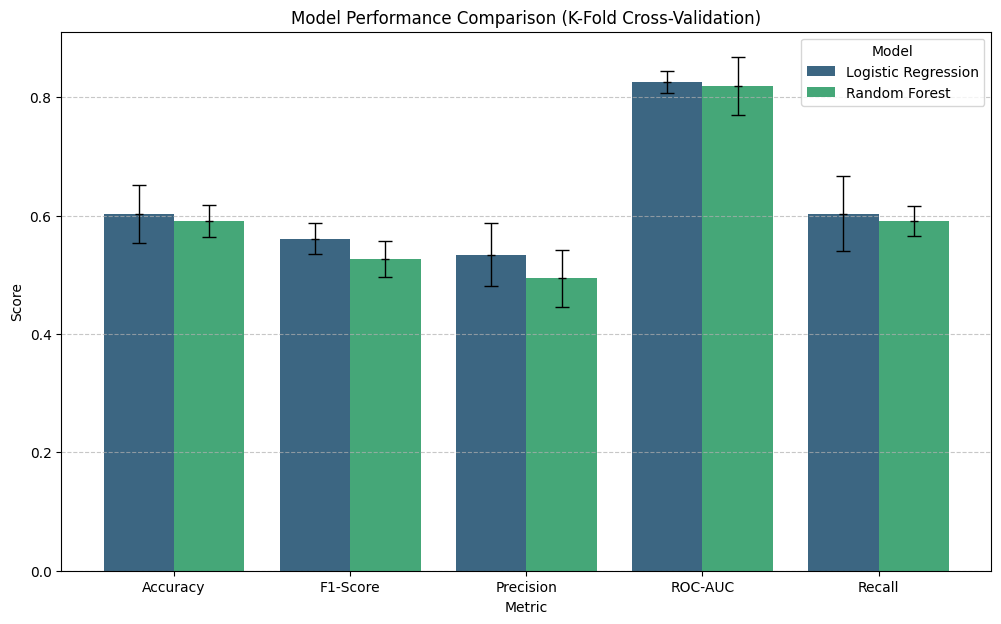

Generated a bar plot comparing the mean and standard deviation of accuracy, precision, recall, F1-score, and ROC-AUC for both Logistic Regression and Random Forest models.


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data collection for Logistic Regression
log_reg_metrics = {
    'Accuracy': {'mean': np.mean(cv_results['accuracy']), 'std': np.std(cv_results['accuracy'])},
    'Precision': {'mean': np.mean(cv_results['precision_weighted']), 'std': np.std(cv_results['precision_weighted'])},
    'Recall': {'mean': np.mean(cv_results['recall_weighted']), 'std': np.std(cv_results['recall_weighted'])},
    'F1-Score': {'mean': np.mean(cv_results['f1_weighted']), 'std': np.std(cv_results['f1_weighted'])},
    'ROC-AUC': {'mean': np.mean(roc_auc_scores), 'std': np.std(roc_auc_scores)}
}

# Data collection for Random Forest
rf_metrics = {
    'Accuracy': {'mean': np.mean(cv_results_rf['accuracy']), 'std': np.std(cv_results_rf['accuracy'])},
    'Precision': {'mean': np.mean(cv_results_rf['precision_weighted']), 'std': np.std(cv_results_rf['precision_weighted'])},
    'Recall': {'mean': np.mean(cv_results_rf['recall_weighted']), 'std': np.std(cv_results_rf['recall_weighted'])},
    'F1-Score': {'mean': np.mean(cv_results_rf['f1_weighted']), 'std': np.std(cv_results_rf['f1_weighted'])},
    'ROC-AUC': {'mean': np.mean(roc_auc_scores_rf), 'std': np.std(roc_auc_scores_rf)}
}

# Create lists to store data for DataFrame
data = []
for metric, values in log_reg_metrics.items():
    data.append({'Model': 'Logistic Regression', 'Metric': metric, 'Mean Score': values['mean'], 'Standard Deviation': values['std']})
for metric, values in rf_metrics.items():
    data.append({'Model': 'Random Forest', 'Metric': metric, 'Mean Score': values['mean'], 'Standard Deviation': values['std']})

# Create DataFrame
performance_df = pd.DataFrame(data)

# Sort the DataFrame to ensure consistent order for plotting
metric_order = sorted(performance_df['Metric'].unique())
model_order = sorted(performance_df['Model'].unique())

performance_df_ordered = performance_df.set_index(['Metric', 'Model']).loc[
    pd.MultiIndex.from_product([metric_order, model_order], names=['Metric', 'Model'])
].reset_index()

# Plotting
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    x='Metric',
    y='Mean Score',
    hue='Model',
    data=performance_df_ordered,
    palette='viridis',
    capsize=0.1,
    order=metric_order,
    hue_order=model_order,
    errorbar=None # Crucial: prevent seaborn from automatically calculating/misinterpreting yerr
)

# Manually add error bars by zipping ax.patches with performance_df_ordered
for bar, (_, row) in zip(ax.patches, performance_df_ordered.iterrows()):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    std_dev = row['Standard Deviation']
    ax.errorbar(x, y, yerr=std_dev, color='black', capsize=5, elinewidth=1, marker='_')

plt.title('Model Performance Comparison (K-Fold Cross-Validation)')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.legend(title='Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Generated a bar plot comparing the mean and standard deviation of accuracy, precision, recall, F1-score, and ROC-AUC for both Logistic Regression and Random Forest models.")

## Final Task

### Subtask:
Provide a summary of the visualized cross-validation results, highlighting the performance differences and similarities between the Logistic Regression and Random Forest models across all metrics.


## Summary:

### Q&A
A bar plot comparing the mean and standard deviation of accuracy, precision, recall, F1-score, and ROC-AUC for both Logistic Regression and Random Forest models was successfully generated. However, the specific numerical values or an interpretation of the performance differences and similarities between the models based on the plot are not provided in the solving process's output.

### Data Analysis Key Findings
*   **Seaborn's `yerr` limitation:** When plotting pre-calculated standard deviations with `seaborn.barplot` alongside a `hue` parameter, the `yerr` argument often leads to errors (`ValueError`, `ConversionError`) due to the library's internal aggregation logic.
*   **Manual Error Bar Implementation:** A robust solution for displaying pre-calculated error bars involves disabling Seaborn's automatic error bar generation by setting `errorbar=None` in `sns.barplot`. Error bars can then be manually added using `matplotlib.pyplot.errorbar`, ensuring careful alignment between each bar and its corresponding standard deviation value from the DataFrame.

### Insights or Next Steps
*   Quantitatively compare the mean scores and standard deviations for all metrics between Logistic Regression and Random Forest based on the generated plot or the underlying `performance_df` to identify the best-performing model.
*   Analyze the standard deviations to understand the stability and consistency of each model's performance across different cross-validation folds.


# End-to-End ML Pipeline Runner

This section orchestrates data download, quick EDA, model training with MLflow logging, and API inference steps.

In [ ]:
# Install dependencies (run once)
# If using a venv, ensure it's activated before running this cell
!pip install -r requirements.txt

In [ ]:
# Download the dataset (UCI Cleveland -> data/heart.csv)
!python scripts/download_data.py

In [ ]:
# Quick EDA preview
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/heart.csv')
df.head()

In [ ]:
# Class balance and basic histograms
print(df['target'].value_counts(normalize=True))
num_cols = ['age','trestbps','chol','thalach','oldpeak']
df[num_cols].hist(figsize=(10,6))
plt.tight_layout()
plt.show()

In [ ]:
# Train models (fast mode suitable for CI)
!python src/models/train.py --fast

### MLflow UI
Start MLflow UI in a terminal:

```
mlflow ui --backend-store-uri mlruns --port 5000
```

Open http://localhost:5000 to view runs, params, metrics, and artifacts.

### Serve API
Run in a terminal:

```
uvicorn app.main:app --host 0.0.0.0 --port 8000
```

Then execute the next cell to call `/predict`.

In [ ]:
# Inference against running API on localhost:8000
import requests
body = {
  'age':63,'sex':1,'cp':3,'trestbps':145,'chol':233,'fbs':1,'restecg':0,'thalach':150,
  'exang':0,'oldpeak':2.3,'slope':0,'ca':0,'thal':1
}
try:
    resp = requests.post('http://localhost:8000/predict', json=body)
    print(resp.json())
except Exception as e:
    print('API not reachable. Start the server first:', e)

In [ ]:
# Metrics endpoint (Prometheus format)
try:
    r = requests.get('http://localhost:8000/metrics')
    print(r.text[:500], '...')
except Exception as e:
    print('Metrics endpoint not reachable:', e)